In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Wed Sep  4 19:19:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install --upgrade ultralytics

from ultralytics import YOLO

# Load a pre-trained YOLOv10n model
model = YOLO("yolov10m.pt")


100%|██████████| 32.1M/32.1M [00:00<00:00, 41.3MB/s]


In [ ]:
model = YOLO(f'{HOME}/yolov10m.pt')


NameError: name 'HOME' is not defined

## Custom Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZlJqU9FcIqZLHUFSWKkY")
project = rf.workspace("qcdgrp19").project("potholedetection-6fvuv")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov11")
print(dataset.location)

/content/PotholeDetection-1


In [ ]:


!yolo task=detect mode=train model=yolov10m.pt data='/content/PotholeDetection-1/data.yaml' epochs=70 imgsz=640 plots=True project='/content/drive/MyDrive/PurdueWork/yolo/yolov10_m' save= True

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/PotholeDetection-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/PurdueWork/yolo/yolov10_m, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls {HOME}/runs/detect/train/

ls: cannot access '{HOME}/runs/detect/train/': No such file or directory


## Inference with Custom Model

In [ ]:

!yolo task=detect mode=predict model="/content/drive/MyDrive/PurdueWork/yolo/yolov10_m/train7/weights/best.pt" conf=0.2 source="/content/drive/MyDrive/PurdueWork/pothole_test_video.mp4" save=True

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs

video 1/1 (frame 1/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 1 pothole, 132.3ms
video 1/1 (frame 2/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 (no detections), 24.1ms
video 1/1 (frame 3/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 (no detections), 24.2ms
video 1/1 (frame 4/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 (no detections), 24.1ms
video 1/1 (frame 5/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 1 pothole, 24.2ms
video 1/1 (frame 6/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 (no detections), 24.2ms
video 1/1 (frame 7/692) /content/drive/MyDrive/PurdueWork/pothole_test_video.mp4: 384x640 1 pothole, 18.5ms
video 1/1 (frame 8/692) /content/drive/MyDrive/Purd

In [ ]:
from IPython.display import Image, display

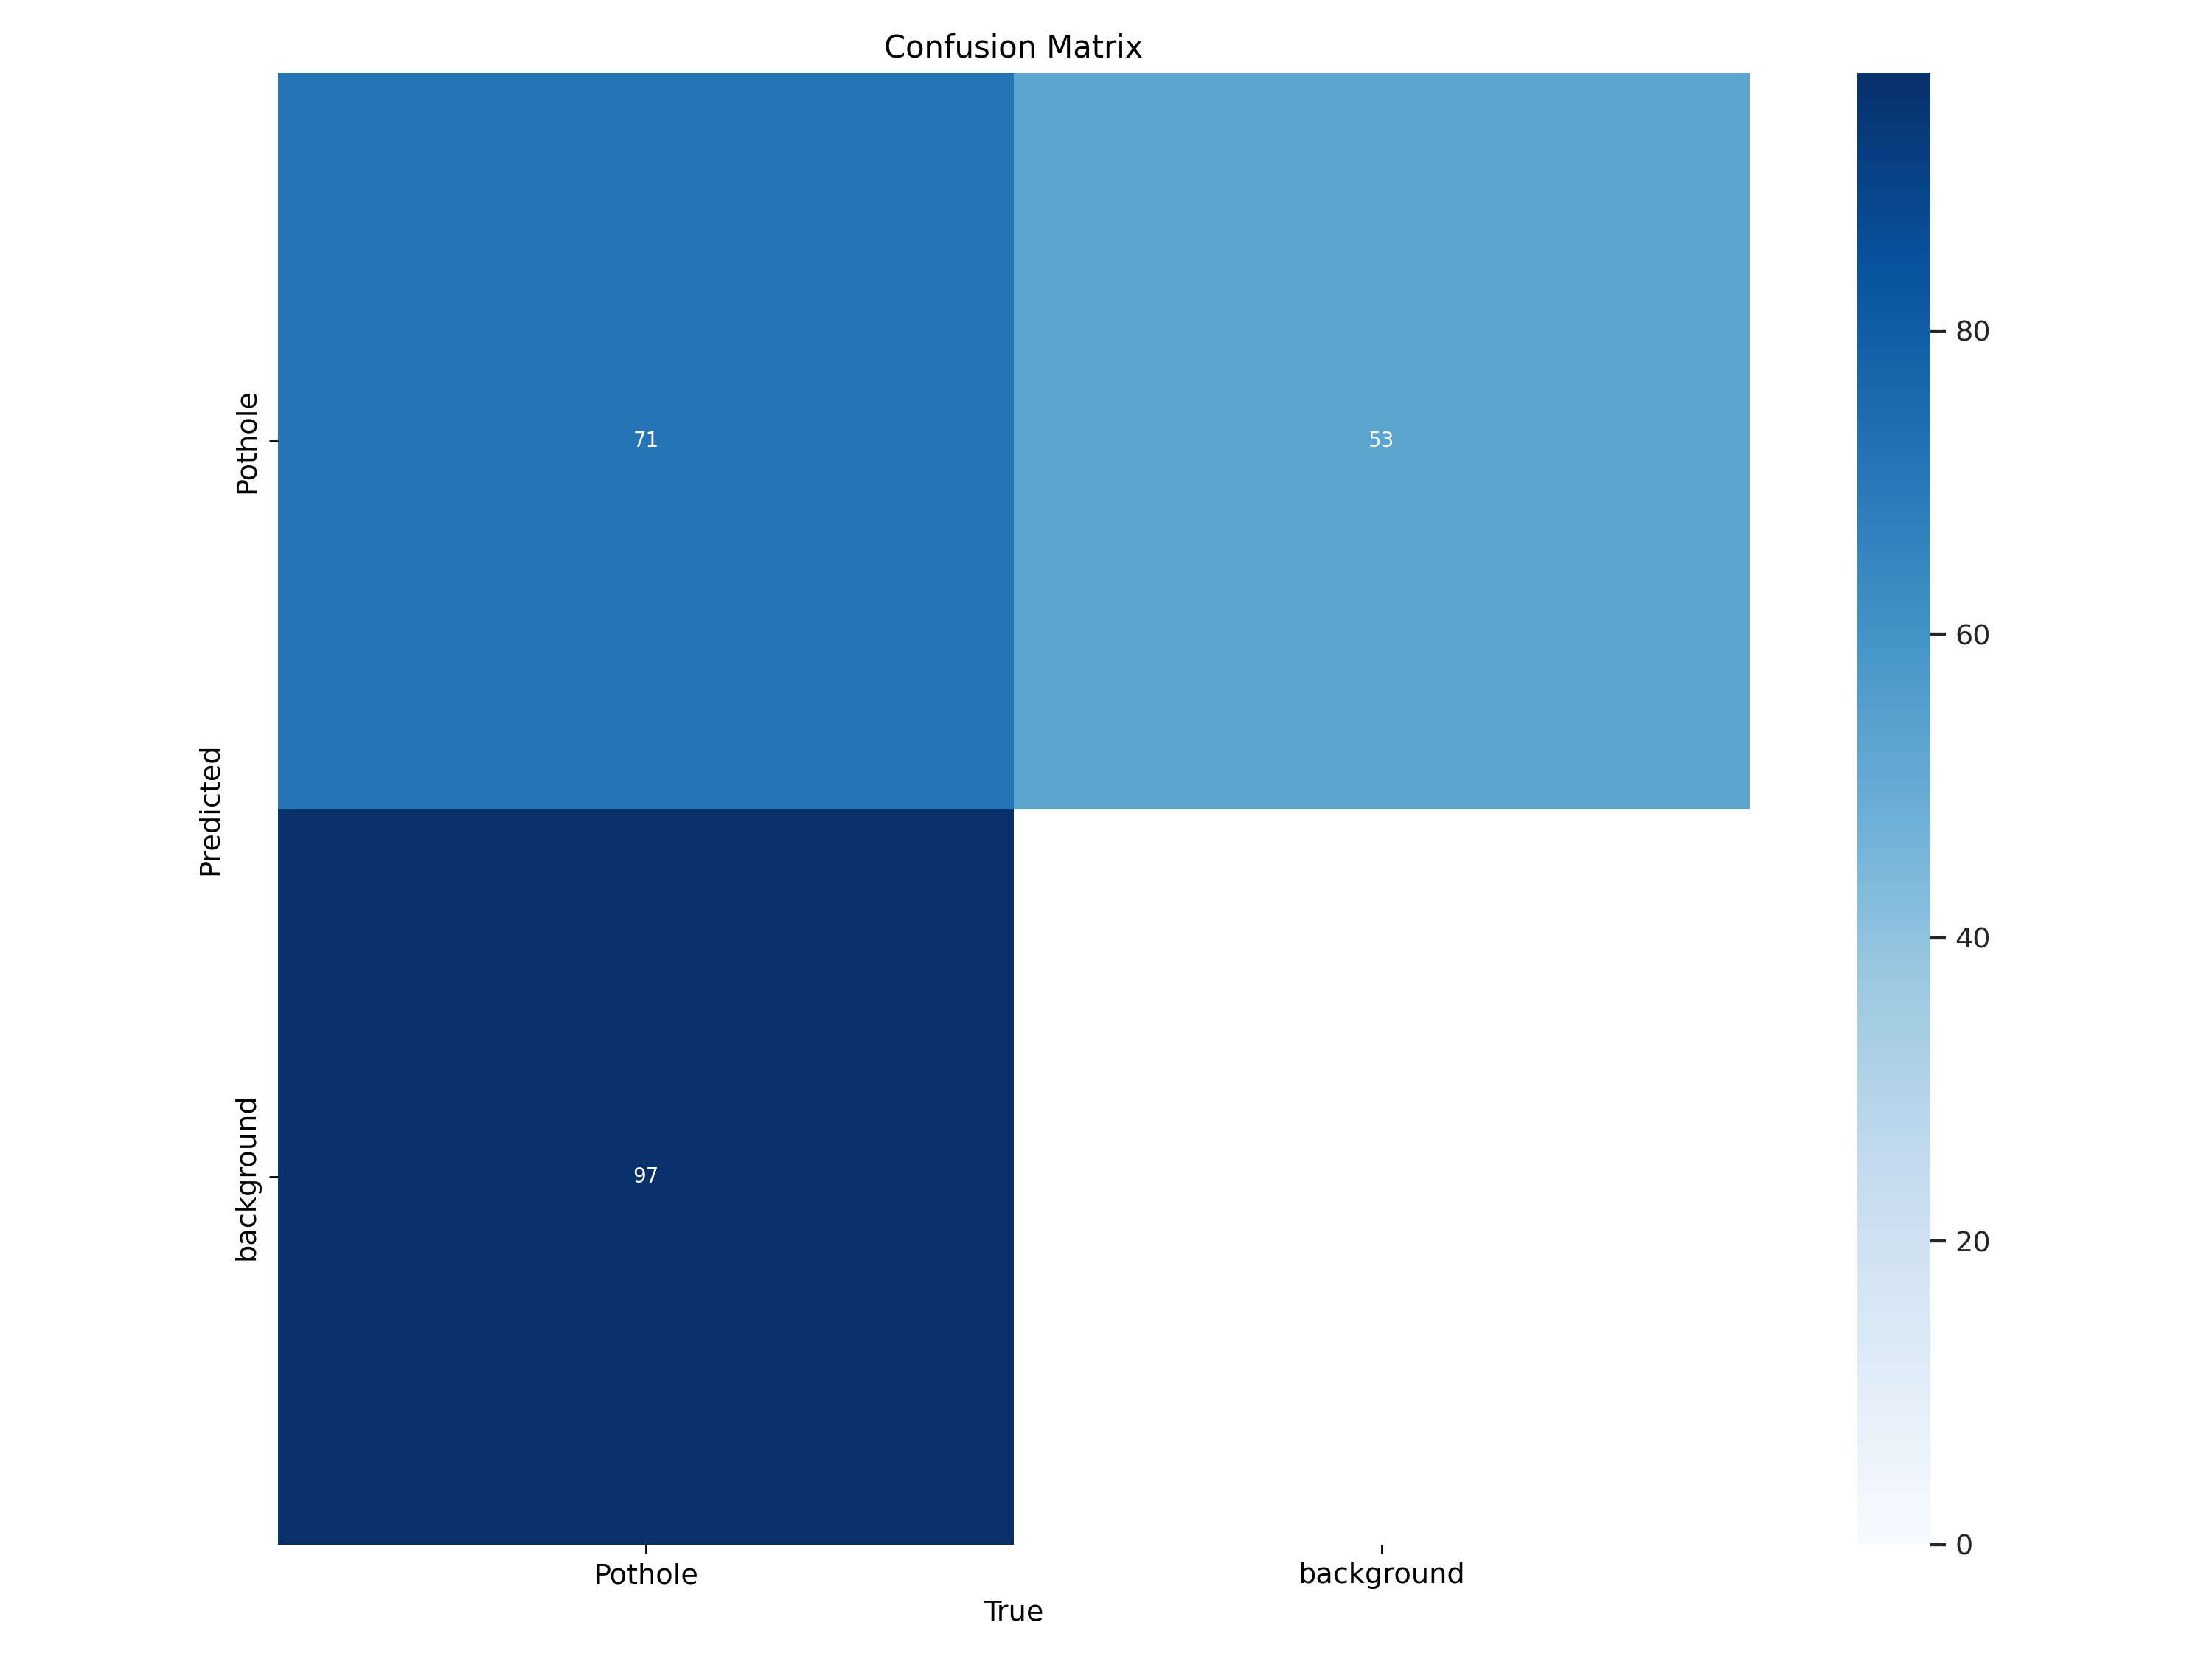

In [ ]:
Image(filename = '/content/drive/MyDrive/PurdueWork/yolo/yolov10_m/train7/confusion_matrix.png', width = 900)

